In [20]:
import pandas as pd
from tabulate import tabulate
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Load the saved data set

In [2]:
training_data = pd.read_csv("../../data/training_model_data.csv")
training_data.head()

,date_id,item_dept,store,item_qty,net_sales,item_qty_lag_1,net_sales_lag_1,item_qty_lag_2,net_sales_lag_2,item_qty_lag_3,net_sales_lag_3,item_qty_lag_4,net_sales_lag_4,item_qty_lag_5,net_sales_lag_5
0,2021-11-01,Beverages,ABC,889.000,251565.79901,1641.933704,357067.186567,1642.920856,357151.904597,1640.689526,356841.10407,1639.001234,356515.202926,1640.633777,356857.908315
1,2021-11-01,Beverages,XYZ,779.000,187931.76902,889.000000,251565.799010,1642.920856,357151.904597,1640.689526,356841.10407,1639.001234,356515.202926,1640.633777,356857.908315
2,2021-11-01,Grocery,ABC,2297.399,427802.62402,779.000000,187931.769020,889.000000,251565.799010,1640.689526,356841.10407,1639.001234,356515.202926,1640.633777,356857.908315
3,2021-11-01,Grocery,XYZ,2986.060,491190.72300,2297.399000,427802.624020,779.000000,187931.769020,889.000000,251565.79901,1639.001234,356515.202926,1640.633777,356857.908315
4,2021-11-01,Household,ABC,1026.000,244206.26601,2986.060000,491190.723000,2297.399000,427802.624020,779.000000,187931.76902,889.000000,251565.799010,1640.633777,356857.908315


In [3]:
# Encode categorical variables
label_encoder_store = LabelEncoder()
label_encoder_dept = LabelEncoder()

In [4]:
training_data['store'] = label_encoder_store.fit_transform(training_data['store'])
training_data['item_dept'] = label_encoder_dept.fit_transform(training_data['item_dept'])
training_data.head()

,date_id,item_dept,store,item_qty,net_sales,item_qty_lag_1,net_sales_lag_1,item_qty_lag_2,net_sales_lag_2,item_qty_lag_3,net_sales_lag_3,item_qty_lag_4,net_sales_lag_4,item_qty_lag_5,net_sales_lag_5
0,2021-11-01,0,0,889.000,251565.79901,1641.933704,357067.186567,1642.920856,357151.904597,1640.689526,356841.10407,1639.001234,356515.202926,1640.633777,356857.908315
1,2021-11-01,0,1,779.000,187931.76902,889.000000,251565.799010,1642.920856,357151.904597,1640.689526,356841.10407,1639.001234,356515.202926,1640.633777,356857.908315
2,2021-11-01,1,0,2297.399,427802.62402,779.000000,187931.769020,889.000000,251565.799010,1640.689526,356841.10407,1639.001234,356515.202926,1640.633777,356857.908315
3,2021-11-01,1,1,2986.060,491190.72300,2297.399000,427802.624020,779.000000,187931.769020,889.000000,251565.79901,1639.001234,356515.202926,1640.633777,356857.908315
4,2021-11-01,2,0,1026.000,244206.26601,2986.060000,491190.723000,2297.399000,427802.624020,779.000000,187931.76902,889.000000,251565.799010,1640.633777,356857.908315


In [8]:
# Define features and target variables for item_qty prediction
X_train = training_data[['date_id', 'item_dept', 'store', 'item_qty_lag_1', 'net_sales_lag_1', 
                         'item_qty_lag_2', 'net_sales_lag_2', 'item_qty_lag_3', 'net_sales_lag_3', 
                         'item_qty_lag_4', 'net_sales_lag_4', 'item_qty_lag_5', 'net_sales_lag_5']]
y_train_sales = training_data['net_sales']

In [9]:
# Convert date_id to numerical value for XGBoost
X_train['date_id'] = pd.to_datetime(X_train['date_id']).map(pd.Timestamp.toordinal)

C:\Users\User\AppData\Local\Temp\ipykernel_11560\2354581374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['date_id'] = pd.to_datetime(X_train['date_id']).map(pd.Timestamp.toordinal)


In [10]:
# Train the XGBoost model for net_sales
model_sales = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
model_sales.fit(X_train, y_train_sales)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [11]:
# Predict on the training dataset (or a validation set if available)
y_train_pred_sales = model_sales.predict(X_train)

In [14]:
# Calculate metrics for net_sales
mse_sales = mean_squared_error(y_train_sales, y_train_pred_sales)
rmse_sales = np.sqrt(mse_sales)
r2_sales = r2_score(y_train_sales, y_train_pred_sales)

In [15]:
# Print the results
print(f"Net Sales - MSE: {mse_sales}, RMSE: {rmse_sales}, R-squared: {r2_sales}")

Net Sales - MSE: 391418466.07869387, RMSE: 19784.298473251303, R-squared: 0.9864243795257022


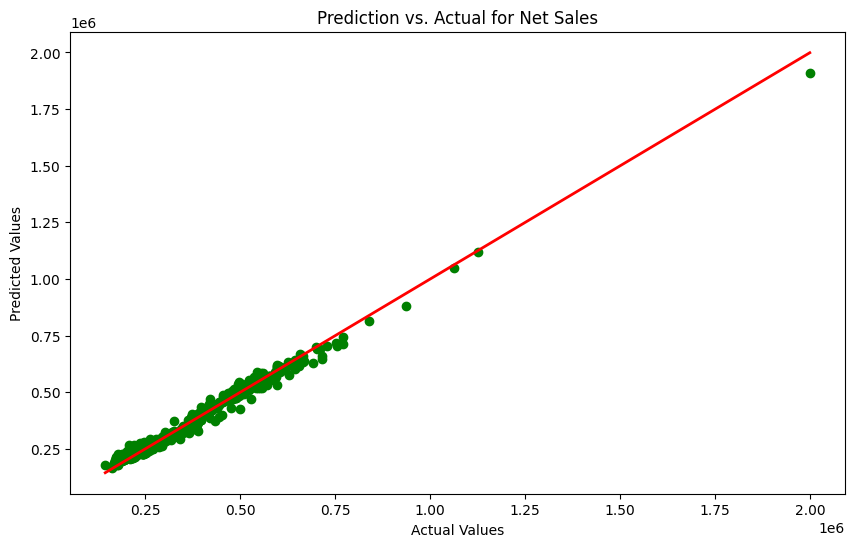

In [17]:
# Plotting Prediction vs. Actual for item_qty
plt.figure(figsize=(10, 6))
plt.scatter(y_train_sales, y_train_pred_sales, color="green")
plt.plot([min(y_train_sales), max(y_train_sales)], [min(y_train_sales), max(y_train_sales)], color='red', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs. Actual for Net Sales")
plt.show()

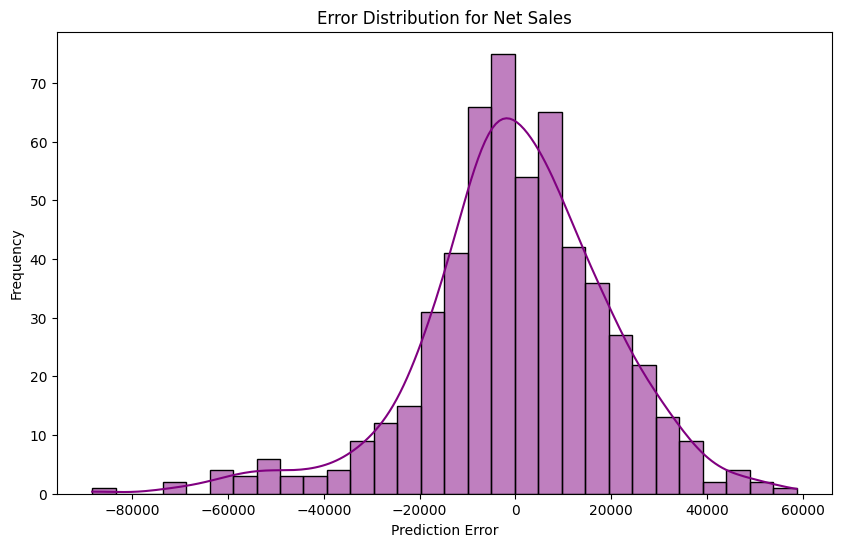

In [19]:
# Plotting Error Distribution for item_qty
plt.figure(figsize=(10, 6))
sns.histplot(y_train_pred_sales - y_train_sales, bins=30, kde=True, color="purple")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution for Net Sales")
plt.show()

### Model Builiding with Linear Regression

In [21]:
# Train the XGBoost model for item_qty
model_sales = LinearRegression()
model_sales.fit(X_train, y_train_sales)

LinearRegression()

In [22]:
y_train_pred_sales = model_sales.predict(X_train)

In [23]:
# Calculate metrics
mse_sales = mean_squared_error(y_train_sales, y_train_pred_sales)
rmse_sales = np.sqrt(mse_sales)
r2_qty = r2_score(y_train_sales, y_train_pred_sales)

In [24]:
# Print the results
print(f"Net Sales - MSE: {mse_sales}, RMSE: {rmse_sales}, R-squared: {r2_sales}")

Net Sales - MSE: 11378710981.626635, RMSE: 106671.04097001508, R-squared: 0.9864243795257022


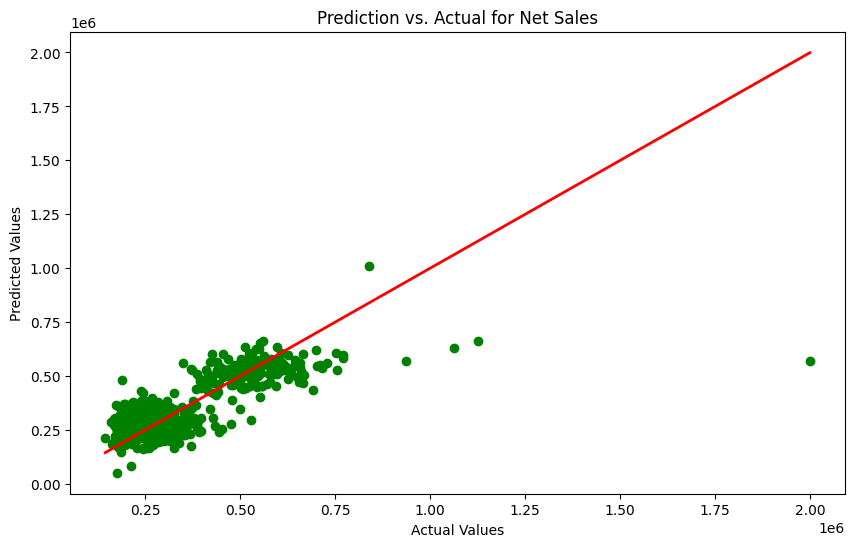

In [25]:
# Prediction vs. Actual Plot for net_sales
plt.figure(figsize=(10, 6))
plt.scatter(y_train_sales, y_train_pred_sales, color="green")
plt.plot([min(y_train_sales), max(y_train_sales)], [min(y_train_sales), max(y_train_sales)], color='red', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs. Actual for Net Sales")
plt.show()

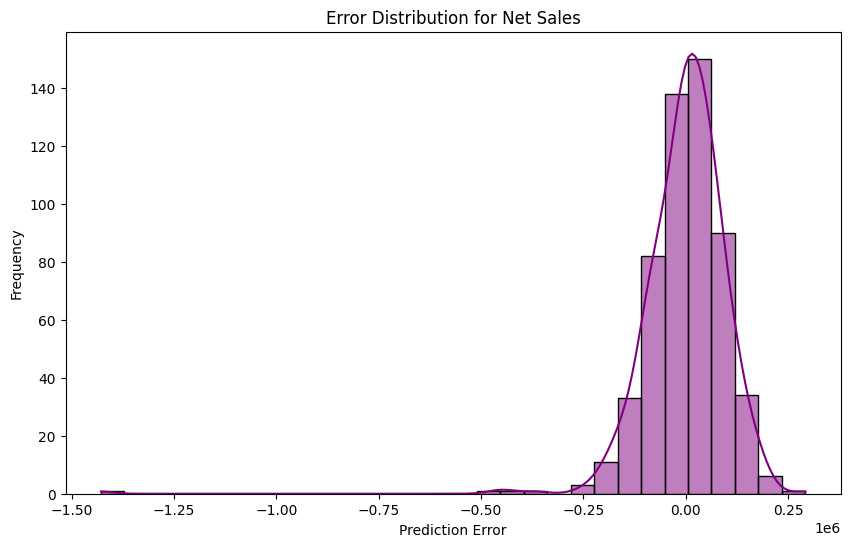

In [26]:
# Error Distribution Plot for net_sales
plt.figure(figsize=(10, 6))
sns.histplot(y_train_pred_sales - y_train_sales, bins=30, kde=True, color="purple")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution for Net Sales")
plt.show()